Average Classification Rate:  [0.765625, 0.76953125, 0.7643229166666666, 0.7721925133689839, 0.7760416666666666, 0.7761229596091982, 0.7721354166666667, 0.7682626538987687, 0.7734791524265209]
Best accuracy:  0.776
Best k:  7


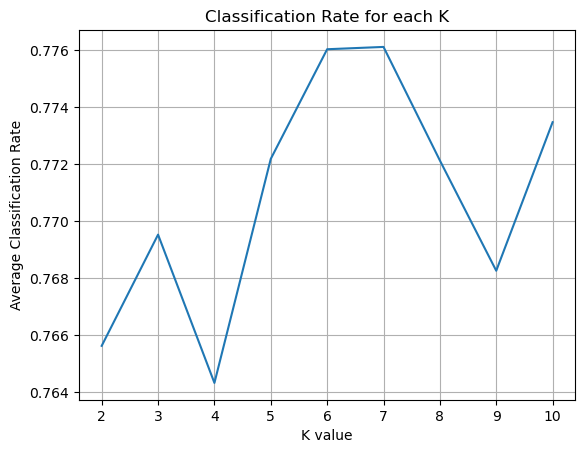

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from scipy.interpolate import make_interp_spline


## PROBLEM 1: LASSO REGRESSION ##
data = pd.read_csv('diabetes.csv')

X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
y = data.iloc[:, 8:]
## Part A ##

# K-fold cross validation for Classification Rate
kvals = range(2, 11)

class_rate = []
for i, k in enumerate(kvals):
    model = LogisticRegression(max_iter=1000)  # max iter set to 1000 for convergence
    score = cross_val_score(model, X, y.to_numpy().reshape(-1), scoring = "accuracy", cv=k) # use k-fold cross validation
    class_rate.append(score.mean())

print("Average Classification Rate: ", class_rate)
idx = class_rate.index(max(class_rate))
print("Best accuracy: ", class_rate[idx].round(3))
print("Best k: ", kvals[idx])

# plot
plt.figure()
plt.plot(kvals, class_rate)
plt.grid()
plt.xlabel("K value")
plt.ylabel("Average Classification Rate")
plt.title("Classification Rate for each K")
plt.savefig("./images/QAplot")

Coefficients of Best model:  [[ 3.63515549e-02  1.10203102e-03 -6.83944746e-04  4.51059516e-05
  -9.94902044e-06  1.13861499e-02  2.60951256e+00  1.28380896e-03]]


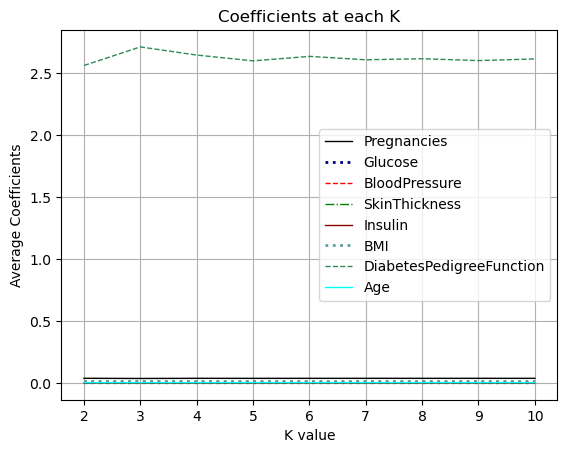

In [3]:
from sklearn.preprocessing import StandardScaler
## Part B ##

# Coefficient Interpretation

coefficients = []
for i, k in enumerate(kvals):
    cv = KFold(k, random_state = 1, shuffle = True) # cross validator
    model = LogisticRegression(max_iter=1000) 
    
    Xn = X.to_numpy()
    yn = y.to_numpy()
    

    # Perform cross-validation with cross_val_predict
    coeff = []
    for train_indices, test_indices in cv.split(X):
        model.fit(Xn[train_indices], yn[train_indices].reshape(-1))
        scaler = StandardScaler()
        scaler.fit(Xn[train_indices])
        standardized_coefficients = model.coef_ / scaler.scale_
        coeff.append(standardized_coefficients)
        
    coefficients.append(np.mean(coeff, axis = 0))
    
best_model = coefficients[idx] # average coefficients of model with highest classification rate
coefficients = np.array(coefficients)
print("Coefficients of Best model: ", best_model)
coefficients = coefficients.reshape(9, 8)

# plot
plt.figure()
plt.plot(kvals, [item[0] for item in coefficients], color='k', linestyle='solid', lw = 1, label=data.columns[0])
plt.plot(kvals, [item[1] for item in coefficients], color='navy', linestyle='dotted', lw = 2, label=data.columns[1])
plt.plot(kvals, [item[2] for item in coefficients], color='r', linestyle='dashed', lw = 1, label=data.columns[2])
plt.plot(kvals, [item[3] for item in coefficients], color='g', linestyle='dashdot', lw = 1, label=data.columns[3])
plt.plot(kvals, [item[4] for item in coefficients], color='darkred', linestyle='solid', lw = 1, label=data.columns[4])
plt.plot(kvals, [item[5] for item in coefficients], color='cadetblue', linestyle='dotted', lw = 2, label=data.columns[5])
plt.plot(kvals, [item[6] for item in coefficients], color='seagreen', linestyle='dashed', lw = 1, label=data.columns[6])
plt.plot(kvals, [item[7] for item in coefficients], color='cyan', linestyle='solid', lw = 1, label=data.columns[7])
plt.grid()
plt.legend()
plt.xlabel("K value")
plt.ylabel("Average Coefficients")
plt.title("Coefficients at each K")
plt.savefig("./images/QBplot")